# Hands-On 2

---

## Soal No. 1
Dengan foto anda sendiri, lakukanlah eksperimen berikut ini. Editlah sebuah foto yang terdapat wajah anda, namun kali ini tidak dengan photoshop, melainkan dengan python. Lakukan penyesuaian berikut ini.
* Lakukan resize untuk foto anda menjadi 1080 pada dimension terpanjangnya. Gunakan cv2.resize untuk melakukan resize.
* Buatlah frame berwarna kuning (RGB value: 255, 255, 0) sebesar 25 pixel + dua digit terakhir NIM anda pada setiap sisi foto anda. Frame tersebut akan mengelilingi foto setebal 25 pixel + dua digit terakhir NIM anda.
* Aturlah intensitas warna pada channel merah di bagian tengah (50 - 150), dan naikkan sebesar 20 poin
* Turunkanlah intensitas warna pada channel biru di atas (200- 250), dan turunkan sebesar 20 poin
* Tampilkanlah histogram dari foto tersebut
* Jelaskan hasil eksperimen anda

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

* **cv2 (OpenCV)**: Digunakan untuk memproses gambar (seperti membaca, mengedit, atau memodifikasi gambar).
* **matplotlib.pyplot**: Digunakan untuk menampilkan gambar dan membuat grafik (histogram).
* **numpy**: Digunakan untuk manipulasi array, yang mempermudah operasi pada data gambar.

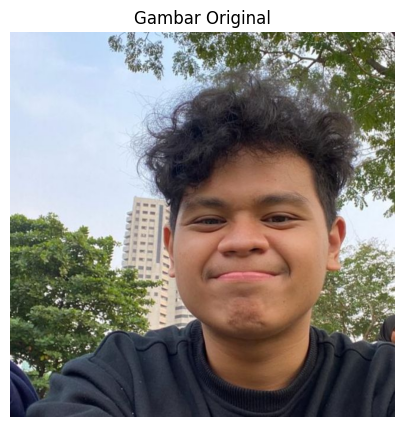

In [30]:
# Load gambar
img = cv2.imread('img1.jpg')  # Ganti dengan path foto kamu

# Tampilkan gambar di plot
plt.figure(figsize=(6, 5))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Gambar Original")
plt.show()


- Membaca Gambar: cv2.imread() membaca gambar dengan format BGR.
- Konversi Warna: cv2.cvtColor(img, cv2.COLOR_BGR2RGB) mengubah gambar ke format RGB, agar warna tampak benar di matplotlib.
- Plot: plt.figure(figsize=(6, 5)) menentukan ukuran gambar saat ditampilkan.
- Tampilkan Gambar: plt.imshow() menampilkan gambar, plt.axis('off') menghilangkan sumbu, dan plt.title() menambahkan judul.

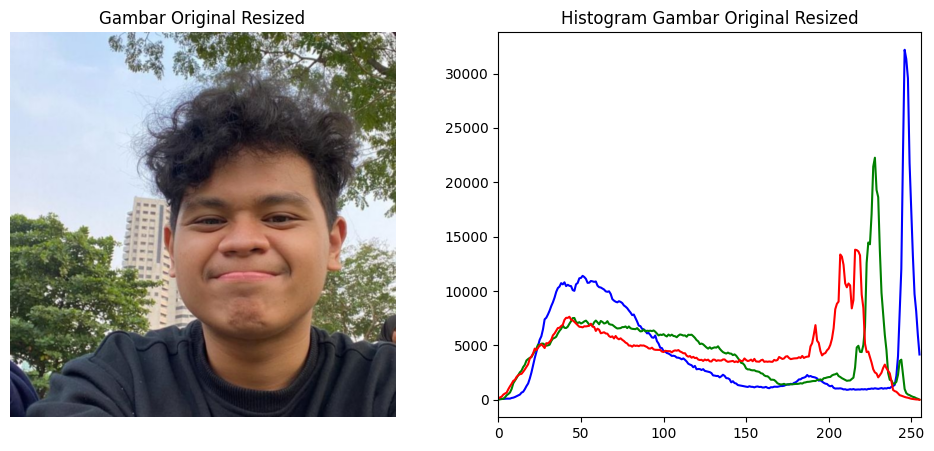

In [26]:
# Dapatkan dimensi gambar
height, width = img.shape[:2]
max_dim = 1080

# Hitung skala resize
scale = max_dim / max(height, width)
new_size = (int(width * scale), int(height * scale))

# Resize gambar
resized_img = cv2.resize(img, new_size)

# Buat plot samping untuk gambar resized dan histogram
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Tampilkan gambar resized di plot sebelah kiri dengan judul
axes[0].imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
axes[0].axis('off')
axes[0].set_title("Gambar Original Resized")

# Tampilkan histogram di plot sebelah kanan
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    hist = cv2.calcHist([resized_img], [i], None, [256], [0, 256])
    axes[1].plot(hist, color=col)
    axes[1].set_xlim([0, 256])
axes[1].set_title("Histogram Gambar Original Resized")

# Tampilkan keseluruhan plot
plt.show()


- Mendapatkan Dimensi Gambar: Mendapatkan tinggi (height) dan lebar (width) gambar.
- Menghitung Skala Resize: scale dihitung berdasarkan dimensi gambar agar sisi terpanjang menjadi 1080 piksel.
- Mengubah Ukuran Gambar: cv2.resize(img, new_size) memperkecil gambar sesuai skala.
- Tampilkan Gambar dan Histogram:
1. axes[0] menampilkan gambar resized.
2. axes[1] menampilkan histogram untuk setiap channel warna (biru, hijau, merah), menggunakan cv2.calcHist() untuk menghitung intensitas tiap channel.

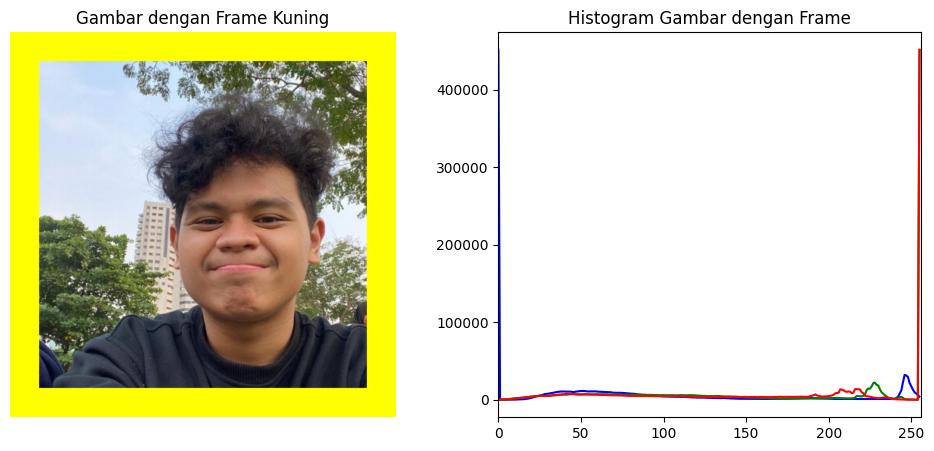

In [37]:
# Tentukan ketebalan frame berdasarkan ketentuan
frame_thickness = 25 + 71 

# Ukuran gambar yang sudah di-resize
resized_height, resized_width = resized_img.shape[:2]

# Buat gambar baru dengan frame (tambahkan frame_thickness di sekitar gambar)
framed_img = cv2.copyMakeBorder(
    resized_img, 
    top=frame_thickness, 
    bottom=frame_thickness, 
    left=frame_thickness, 
    right=frame_thickness, 
    borderType=cv2.BORDER_CONSTANT, 
    value=(0, 255, 255) 
)

# Tampilkan gambar dengan frame dan histogramnya secara berdampingan
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gambar dengan frame
axes[0].imshow(cv2.cvtColor(framed_img, cv2.COLOR_BGR2RGB))
axes[0].axis('off')
axes[0].set_title("Gambar dengan Frame Kuning")

# Histogram dari gambar dengan frame
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    hist = cv2.calcHist([framed_img], [i], None, [256], [0, 256])
    axes[1].plot(hist, color=col)
    axes[1].set_xlim([0, 256])
axes[1].set_title("Histogram Gambar dengan Frame")

# Tampilkan keseluruhan plot
plt.show()


- Mengatur Ketebalan Frame: frame_thickness ditentukan sesuai instruksi (25 piksel + dua digit terakhir NIM).
- Menambahkan Frame Kuning: cv2.copyMakeBorder() menambahkan frame dengan ketebalan frame_thickness di sekitar gambar. value=(0, 255, 255) menetapkan warna kuning (BGR).
- Menampilkan Gambar dan Histogram: Gambar dengan frame kuning ditampilkan di samping histogramnya.

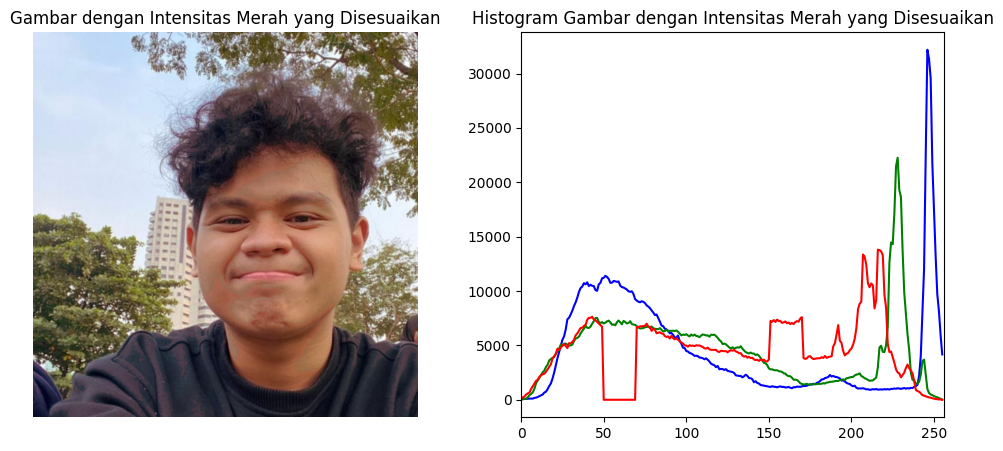

In [35]:
# Buat salinan gambar untuk pengeditan
modified_img = resized_img.copy()

# Ambil channel merah (index 2 untuk channel merah di OpenCV karena formatnya BGR)
red_channel = modified_img[:, :, 2]

# Identifikasi piksel yang berada dalam rentang 50 hingga 150
mask = (red_channel >= 50) & (red_channel <= 150)

# Tambahkan 20 poin ke piksel yang sesuai dalam rentang
red_channel[mask] = np.clip(red_channel[mask] + 20, 0, 255)

# Tampilkan gambar hasil modifikasi dan histogramnya
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gambar hasil modifikasi
axes[0].imshow(cv2.cvtColor(modified_img, cv2.COLOR_BGR2RGB))
axes[0].axis('off')
axes[0].set_title("Gambar dengan Intensitas Merah yang Disesuaikan")

# Histogram dari gambar hasil modifikasi
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    hist = cv2.calcHist([modified_img], [i], None, [256], [0, 256])
    axes[1].plot(hist, color=col)
    axes[1].set_xlim([0, 256])
axes[1].set_title("Histogram Gambar dengan Intensitas Merah yang Disesuaikan")

# Tampilkan keseluruhan plot
plt.show()


- Salin Gambar untuk Editan: modified_img = resized_img.copy() memastikan kita tidak mengubah gambar asli.
- Channel Merah: modified_img[:, :, 2] memilih channel merah di gambar.
- Pilih Piksel di Rentang 50-150: mask memilih piksel di channel merah dengan intensitas antara 50 dan 150.
- Tambah Intensitas: np.clip() memastikan nilai tidak melebihi 255.
- Tampilkan Gambar dan Histogram: Menampilkan gambar yang telah disesuaikan intensitas merahnya.

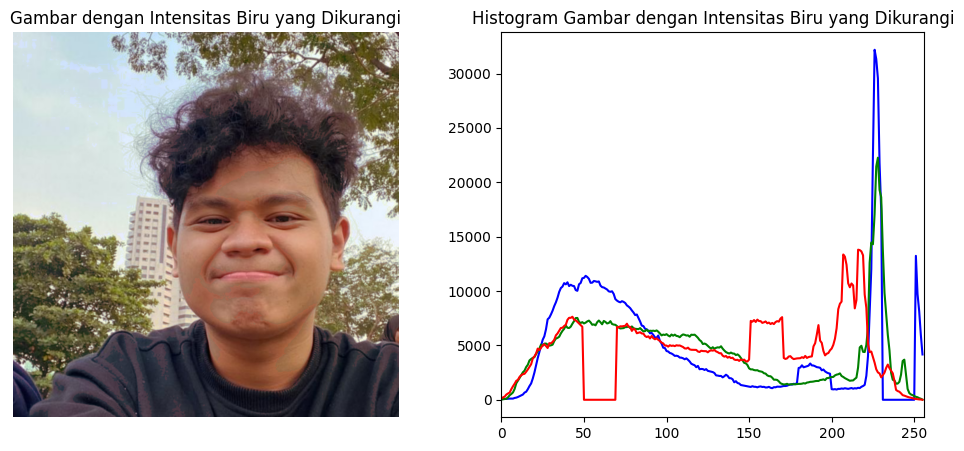

In [36]:
# Buat salinan gambar untuk pengeditan
modified_img = modified_img.copy()  # Pastikan ini adalah gambar hasil perubahan sebelumnya

# Ambil channel biru (index 0 untuk channel biru di OpenCV karena formatnya BGR)
blue_channel = modified_img[:, :, 0]

# Identifikasi piksel yang berada dalam rentang 200 hingga 250
mask = (blue_channel >= 200) & (blue_channel <= 250)

# Kurangi 20 poin dari piksel yang sesuai dalam rentang
blue_channel[mask] = np.clip(blue_channel[mask] - 20, 0, 255)

# Tampilkan gambar hasil modifikasi dan histogramnya
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gambar hasil modifikasi
axes[0].imshow(cv2.cvtColor(modified_img, cv2.COLOR_BGR2RGB))
axes[0].axis('off')
axes[0].set_title("Gambar dengan Intensitas Biru yang Dikurangi")

# Histogram dari gambar hasil modifikasi
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    hist = cv2.calcHist([modified_img], [i], None, [256], [0, 256])
    axes[1].plot(hist, color=col)
    axes[1].set_xlim([0, 256])
axes[1].set_title("Histogram Gambar dengan Intensitas Biru yang Dikurangi")

# Tampilkan keseluruhan plot
plt.show()


Disini telah berhasil mengurangi intensitas warna channel biru pada gambar yang dimodifikasi dengan menggunakan teknik masking untuk memilih piksel yang sesuai. Dengan mengurangi intensitas biru, kita dapat mengubah tampilan warna gambar secara keseluruhan. Histogram yang ditampilkan menunjukkan bagaimana perubahan ini mempengaruhi distribusi intensitas piksel dalam gambar, di mana kita dapat melihat penurunan pada area intensitas biru. Proses ini memberikan pemahaman yang lebih baik tentang bagaimana pengeditan warna dapat dilakukan secara terprogram menggunakan Python dan OpenCV.

---

## Soal No. 2
Dengan foto anda sendiri, lakukanlah eksperimen berikut ini
* Convert image dari RGB menjadi Grayscale
* Tampilkan histogram dari foto tersebut
* Lakukanlah normalisasi level intensitas warna pada foto tersebut. Aturlah agar intensitas warna terendah menjadi 0, dan intensitas warna tertinggi menjadi 255
* Tampilkan histogram dari hasil normalisasi
* Buatlah pixel-art dari foto tersebut. Caranya adalah dengan mengubah intensitas warna menjadi 0 atau 255. Jika intensitas warna < 128, maka ubah menjadi 0, dan jika intensitas warna >= 128, maka ubah menjadi 255.
* Tunjukkan hasilnya

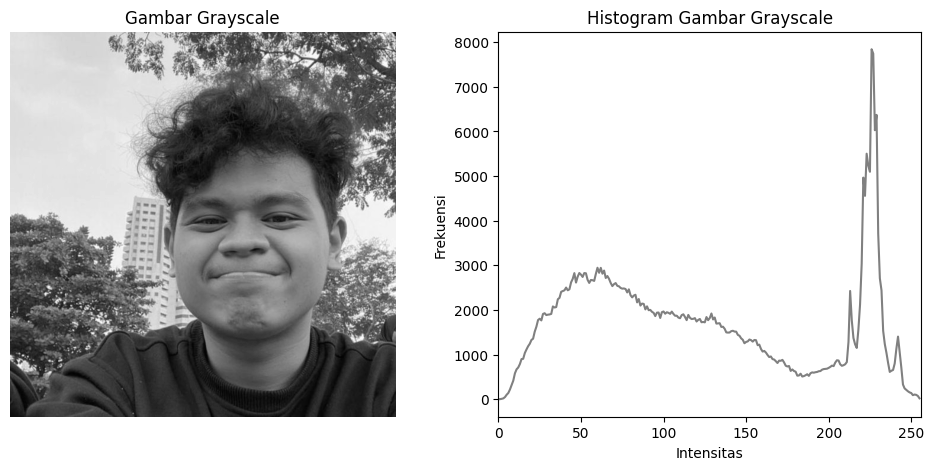

In [42]:
# Load gambar
img = cv2.imread('img1.jpg')  # Ganti dengan path foto kamu

# Convert gambar ke grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Tampilkan gambar grayscale dan histogramnya secara berdampingan
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Tampilkan gambar grayscale di plot sebelah kiri
axes[0].imshow(gray_img, cmap='gray')
axes[0].axis('off')
axes[0].set_title("Gambar Grayscale")

# Hitung dan tampilkan histogram dari gambar grayscale di plot sebelah kanan
hist_gray = cv2.calcHist([gray_img], [0], None, [256], [0, 256])
axes[1].plot(hist_gray, color='gray')
axes[1].set_xlim([0, 256])
axes[1].set_title("Histogram Gambar Grayscale")
axes[1].set_xlabel("Intensitas")
axes[1].set_ylabel("Frekuensi")

# Tampilkan keseluruhan plot
plt.show()


- Load Gambar: Menggunakan cv2.imread(), kita memuat gambar dari file. Anda perlu mengganti 'img1.jpg' dengan path gambar Anda sendiri.
- Konversi ke Grayscale: cv2.cvtColor() digunakan untuk mengubah gambar berwarna (RGB) menjadi grayscale, yang hanya memiliki satu channel (intensitas dari hitam ke putih).
- Menampilkan Gambar dan Histogram:
- Disini sayamenggunakan plt.subplots() untuk membuat dua plot: satu untuk gambar grayscale dan satu untuk histogram.
imshow() digunakan untuk menampilkan gambar grayscale, sementara calcHist() menghitung histogram intensitas piksel dan plot() digunakan untuk menampilkannya.
- Menampilkan Plot: Akhirnya, plt.show() digunakan untuk menampilkan gambar dan histogram di layar.

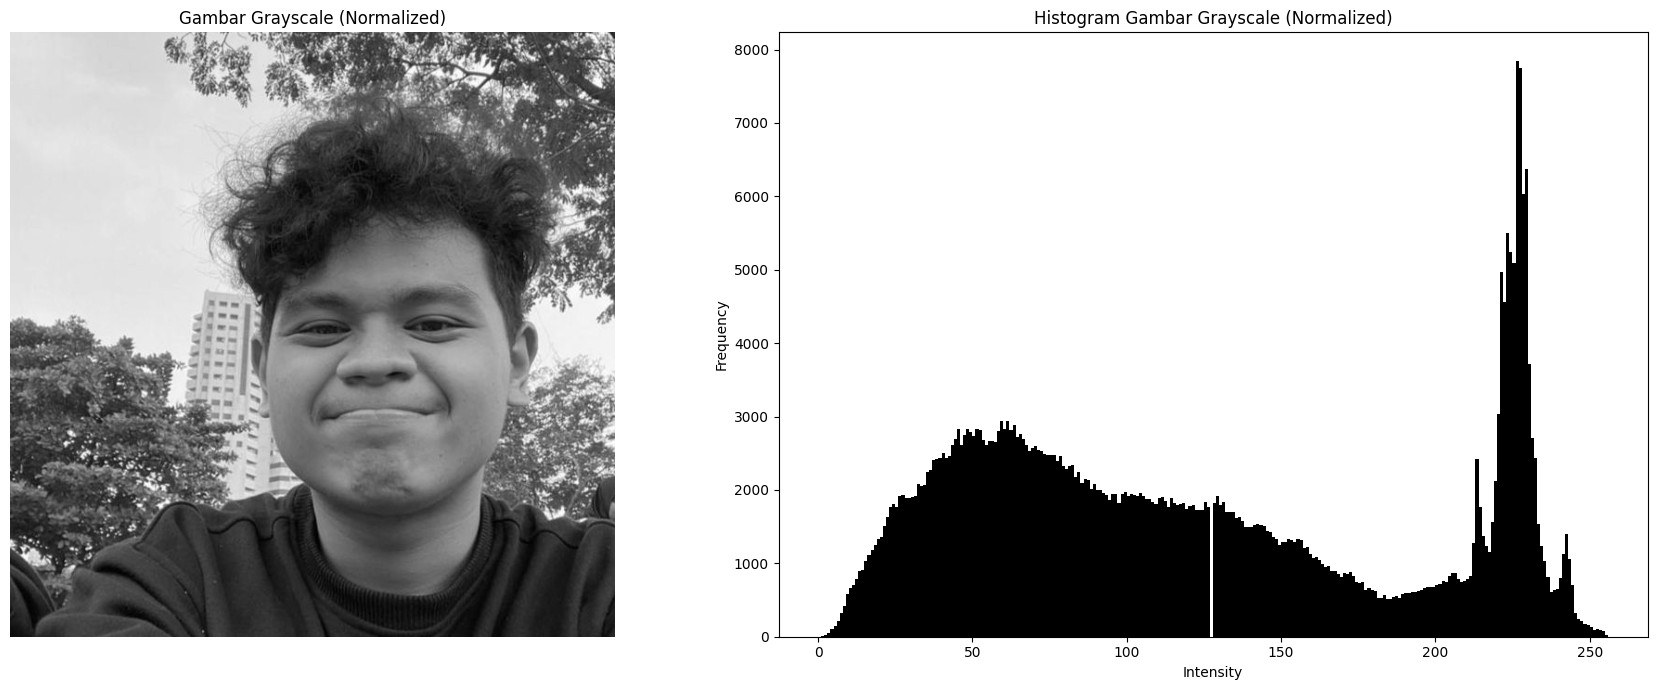

In [47]:
# Load gambar
img = cv2.imread('img1.jpg')  # Ganti dengan path foto kamu

# Convert gambar ke grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Normalisasi level intensitas warna
img_normalized = cv2.normalize(gray_img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

# Tampilkan gambar grayscale yang dinormalisasi dan histogramnya secara berdampingan
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Tampilkan gambar grayscale yang dinormalisasi di plot sebelah kiri
axes[0].imshow(img_normalized, cmap='gray')
axes[0].set_title('Gambar Grayscale (Normalized)')
axes[0].axis('off')

# Hitung dan tampilkan histogram dari gambar grayscale yang dinormalisasi di plot sebelah kanan
axes[1].hist(img_normalized.ravel(), bins=256, range=[0, 256], color='black')
axes[1].set_title('Histogram Gambar Grayscale (Normalized)')
axes[1].set_xlabel('Intensity')
axes[1].set_ylabel('Frequency')

# Tampilkan keseluruhan plot
plt.tight_layout()
plt.show()


- Memuat dan Mengubah Gambar ke Grayscale: Sama seperti sebelumnya, kita memuat gambar dan mengubahnya menjadi grayscale.
- Normalisasi: cv2.normalize() digunakan untuk menyesuaikan intensitas piksel. Kita mengatur alpha=0 (nilai minimum) dan beta=255 (nilai maksimum), yang berarti kita ingin mengubah semua intensitas dalam gambar grayscale agar terdistribusi antara 0 dan 255.
- Menampilkan Gambar dan Histogram:
- Sama seperti sebelumnya, kita membuat dua plot: satu untuk gambar grayscale yang dinormalisasi dan satu untuk histogramnya.
hist() digunakan untuk menghitung dan menampilkan histogram dari gambar yang telah dinormalisasi.
- Menampilkan Plot: Kita menggunakan plt.tight_layout() untuk memastikan semua elemen dalam plot tertata rapi, kemudian menampilkannya dengan plt.show().

Di cell ini, telah menormalisasi intensitas gambar grayscale sehingga seluruh rentang intensitas digunakan dengan baik, dari 0 hingga 255. Histogram menunjukkan bagaimana intensitas baru terdistribusi setelah normalisasi.

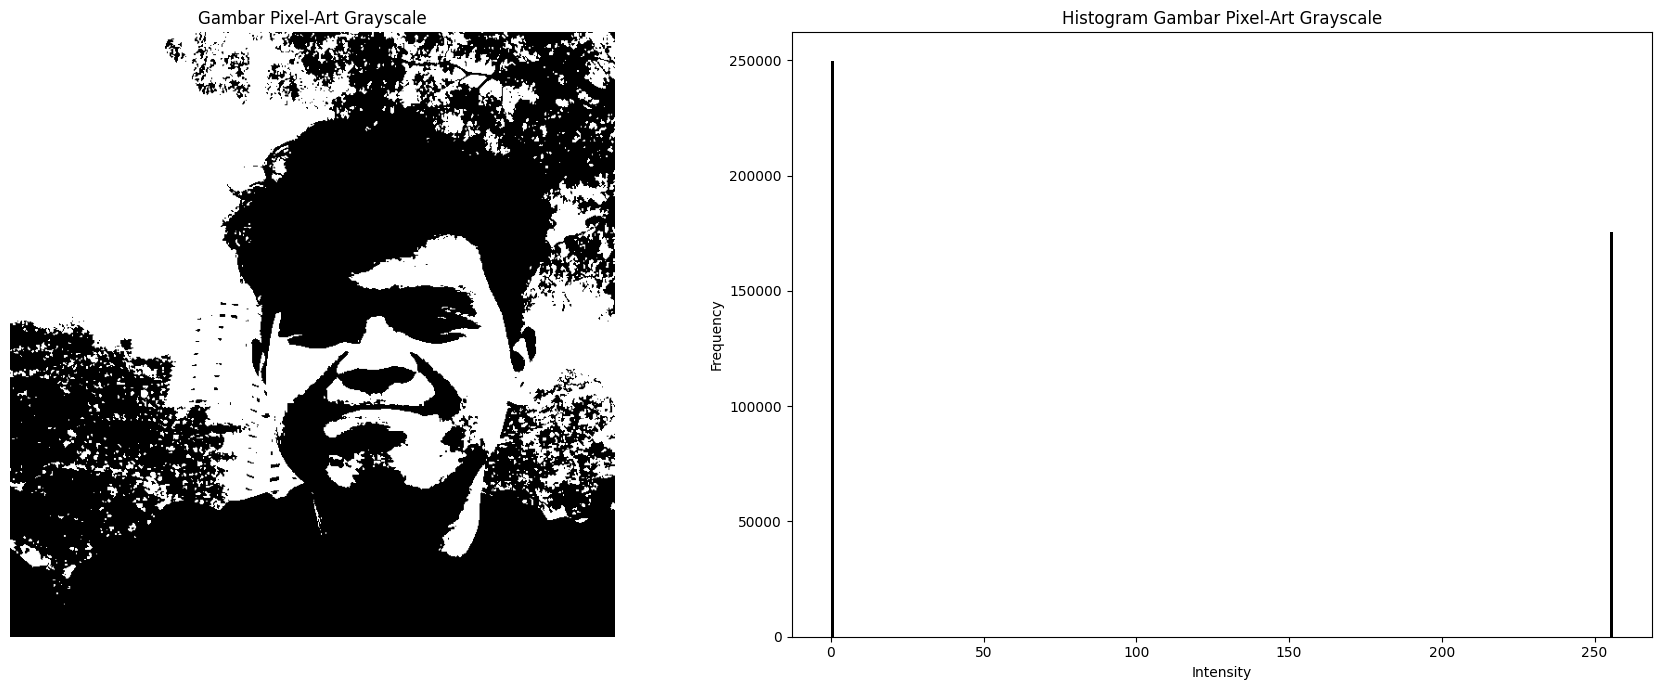

False

In [48]:
import os

# Buat pixel-art dari gambar grayscale yang dinormalisasi
img_pixel_art = np.where(img_normalized > 128, 255, 0).astype(np.uint8)

# Tampilkan gambar pixel-art dan histogramnya secara berdampingan
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Tampilkan gambar pixel-art di plot sebelah kiri
axes[0].imshow(img_pixel_art, cmap='gray')
axes[0].set_title('Gambar Pixel-Art Grayscale')
axes[0].axis('off')

# Hitung dan tampilkan histogram dari gambar pixel-art di plot sebelah kanan
axes[1].hist(img_pixel_art.ravel(), bins=256, range=[0, 256], color='black')
axes[1].set_title('Histogram Gambar Pixel-Art Grayscale')
axes[1].set_xlabel('Intensity')
axes[1].set_ylabel('Frequency')

# Tampilkan keseluruhan plot
plt.tight_layout()
plt.show()

# Simpan gambar pixel-art
path_pixel_art = os.path.join(os.getcwd(), 'data', 'pixel-art-img.jpg')
cv2.imwrite(path_pixel_art, img_pixel_art)


- Buat Pixel-Art: Menggunakan np.where(), kita mengubah gambar grayscale yang dinormalisasi menjadi format pixel-art. Jika intensitas piksel lebih besar dari 128, kita set menjadi 255 (putih); jika kurang dari 128, kita set menjadi 0 (hitam).
- Menampilkan Gambar Pixel-Art dan Histogram:
- Kita membuat dua plot lagi, satu untuk gambar pixel-art dan satu untuk histogramnya.
- Histogram dari gambar pixel-art dihitung dan ditampilkan menggunakan hist().
- Menampilkan Plot: Kita menggunakan plt.tight_layout() untuk memperbaiki tata letak, lalu menampilkannya dengan plt.show().

---



## Soal No. 3
Dengan foto anda sendiri, lakukanlah eksperimen berikut ini

- Naikkan kecerahan (brightnes) pada foto tersebut. Anda tidak boleh menggunakan library cv2 untuk menaikkan kecerahan. Anda hanya boleh menggunakan operasi matriks. Jelaskan langkah-langkah yang anda lakukan. Tampilkan histogram dari foto tersebut
- Turunkan saturasi warna pada foto tersebut. Anda tidak boleh menggunakan library cv2 untuk menurunkan saturasi warna. Anda hanya boleh menggunakan operasi matriks. Jelaskan langkah-langkah yang anda lakukan. Tampilkan histogram dari foto tersebut
- Turunkan kontras pada foto tersebut. Anda tidak boleh menggunakan library cv2 untuk menurunkan kontras. Anda hanya boleh menggunakan operasi matriks. Jelaskan langkah-langkah yang anda lakukan.
- Tampilkan histogram dari foto tersebut

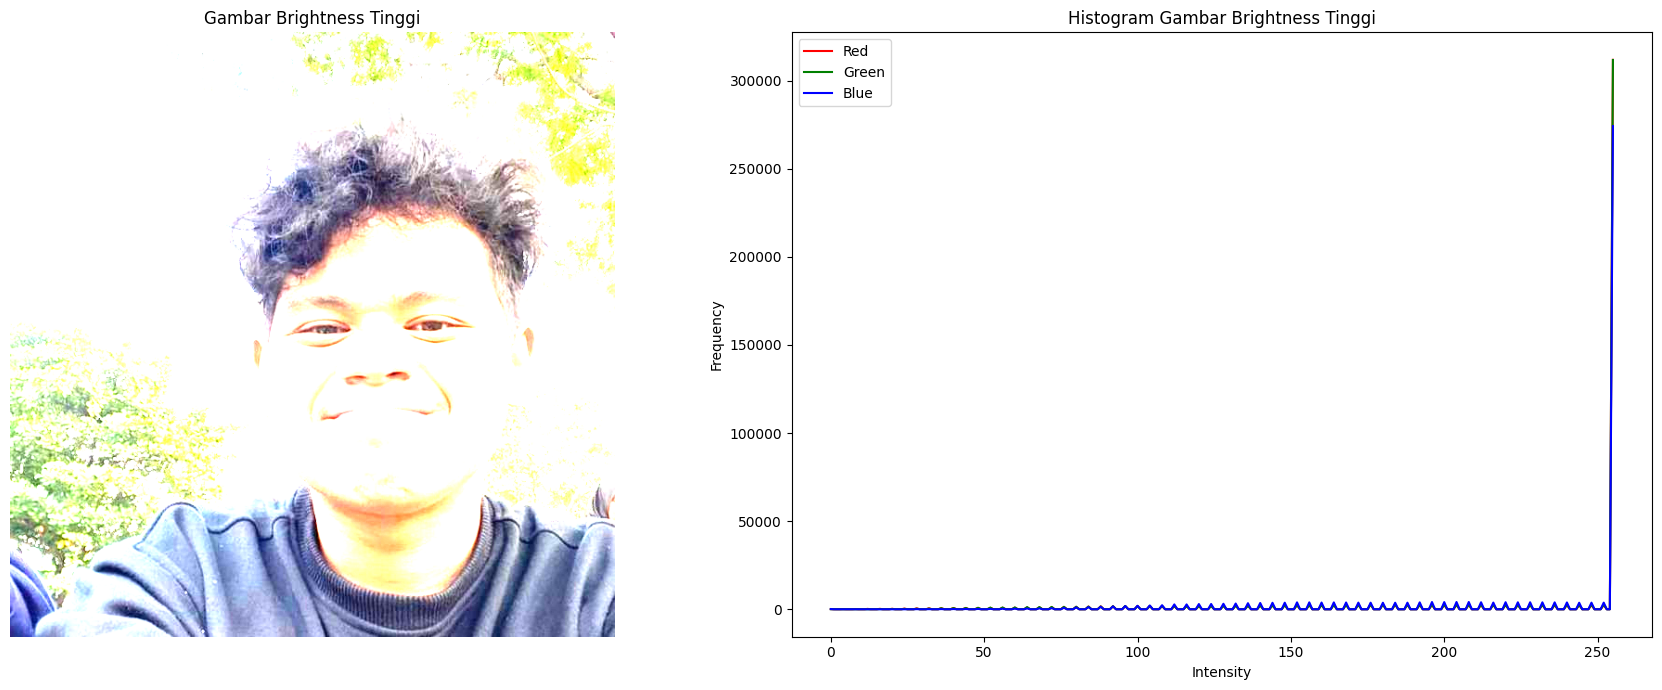

In [53]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Tentukan path gambar
path_img_sample = os.path.join(os.getcwd(), 'img1.JPG')

# Periksa apakah file gambar ada
if not os.path.exists(path_img_sample):
    print('File not found!', path_img_sample)
else:
    # Load gambar
    img_sample_rgb = plt.imread(path_img_sample).astype(np.float32)

    # Tentukan faktor peningkatan kecerahan
    increase_img_brightness = 4

    # Naikkan kecerahan dengan mengalikan setiap piksel dengan faktor kecerahan
    img_bright_sample = np.clip(img_sample_rgb * increase_img_brightness, 0, 255).astype(np.uint8)

    # Hitung histogram untuk setiap channel warna
    red_histo_img = np.histogram(img_bright_sample[..., 0], bins=256, range=[0, 256])[0]
    green_histo_img = np.histogram(img_bright_sample[..., 1], bins=256, range=[0, 256])[0]
    blue_histo_img = np.histogram(img_bright_sample[..., 2], bins=256, range=[0, 256])[0]

    # Tampilkan gambar hasil peningkatan kecerahan dan histogramnya
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))

    # Tampilkan gambar hasil peningkatan kecerahan
    axes[0].imshow(img_bright_sample)
    axes[0].set_title('Gambar Brightness Tinggi')
    axes[0].axis('off')

    # Tampilkan histogram untuk setiap channel warna
    axes[1].plot(red_histo_img, color='red', label='Red')
    axes[1].plot(green_histo_img, color='green', label='Green')
    axes[1].plot(blue_histo_img, color='blue', label='Blue')
    axes[1].set_title('Histogram Gambar Brightness Tinggi')
    axes[1].set_xlabel('Intensity')
    axes[1].set_ylabel('Frequency')
    axes[1].legend()

    # Tampilkan keseluruhan plot
    plt.tight_layout()
    plt.show()

    # Simpan gambar yang telah ditingkatkan kecerahannya
    path_hi_bright_img = os.path.join(os.getcwd(), 'hi-bright-img.jpg')
    plt.imsave(path_hi_bright_img, img_bright_sample)



- Membaca dan Memproses Gambar: Saya memuat gambar menggunakan plt.imread(), dan mengkonversinya menjadi tipe data float32 untuk memungkinkan perhitungan yang lebih presisi.
- Peningkatan Kecerahan: Kecerahan gambar ditingkatkan dengan mengalikan nilai piksel dengan faktor tertentu (4). Hasilnya kemudian dipastikan tetap dalam rentang [0, 255] menggunakan np.clip() dan diubah kembali ke tipe data uint8 untuk menyimpan gambar.

Pada langkah ini, telah berhasil meningkatkan kecerahan gambar dan memvisualisasikannya beserta histogramnya.

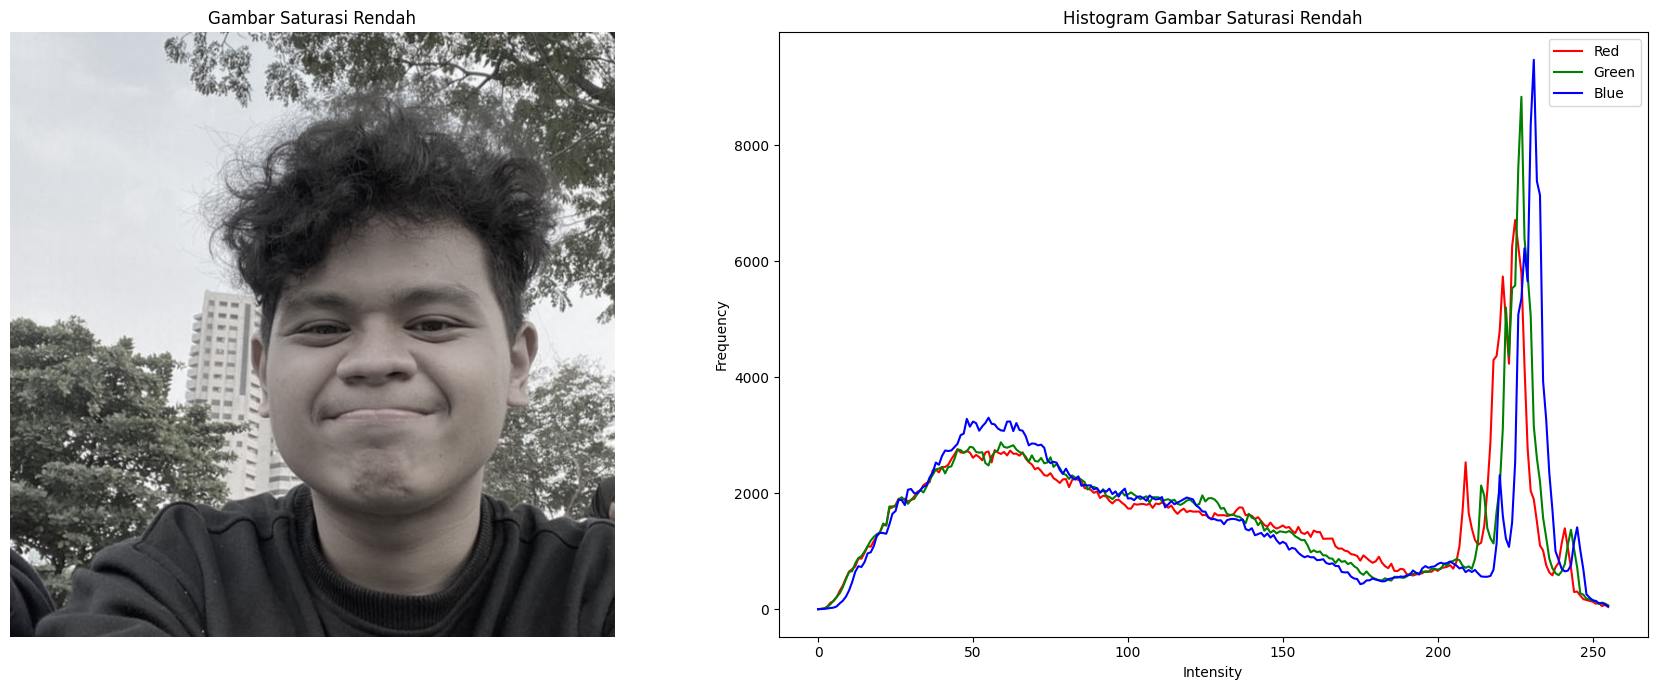

In [72]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Tentukan path gambar
path_img_sample = os.path.join(os.getcwd(), 'img1.JPG')

# Periksa apakah file gambar ada
if not os.path.exists(path_img_sample):
    print('File not found!', path_img_sample)
else:
    # Load gambar dan normalisasi dari [0, 255] ke [0, 1]
    img_sample_rgb = plt.imread(path_img_sample).astype(np.float32) / 255.0

    # Pastikan gambar dalam format RGB (hapus alpha channel jika ada)
    if img_sample_rgb.shape[2] == 4:  # Jika gambar RGBA
        img_sample_rgb = img_sample_rgb[:, :, :3]  # Ambil hanya RGB

    # Tentukan faktor penurunan saturasi
    decrease_img_saturation = 0.2

    # Hitung luminositas untuk setiap piksel
    luminosity = 0.2989 * img_sample_rgb[:, :, 0] + 0.5870 * img_sample_rgb[:, :, 1] + 0.1140 * img_sample_rgb[:, :, 2]

    # Turunkan saturasi
    img_desaturated_sample = (decrease_img_saturation * img_sample_rgb + (1 - decrease_img_saturation) * luminosity[:, :, np.newaxis])

    # Pastikan nilai piksel dalam rentang [0, 1]
    img_desaturated_sample = np.clip(img_desaturated_sample, 0, 1)

    # Hitung histogram untuk setiap channel warna
    red_histo_img = np.histogram(img_desaturated_sample[..., 0], bins=256, range=[0, 1])[0]
    green_histo_img = np.histogram(img_desaturated_sample[..., 1], bins=256, range=[0, 1])[0]
    blue_histo_img = np.histogram(img_desaturated_sample[..., 2], bins=256, range=[0, 1])[0]

    # Tampilkan gambar dengan saturasi rendah dan histogramnya
    fig, ax = plt.subplots(1, 2, figsize=(18, 7))

    # Tampilkan gambar dengan saturasi rendah
    ax[0].imshow(img_desaturated_sample)
    ax[0].set_title('Gambar Saturasi Rendah')
    ax[0].axis('off')

    # Tampilkan histogram untuk setiap channel warna
    ax[1].plot(red_histo_img, color='red', label='Red')
    ax[1].plot(green_histo_img, color='green', label='Green')
    ax[1].plot(blue_histo_img, color='blue', label='Blue')
    ax[1].set_title('Histogram Gambar Saturasi Rendah')
    ax[1].set_xlabel('Intensity')
    ax[1].set_ylabel('Frequency')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

    # Simpan gambar dengan saturasi rendah
    path_low_saturated_img = os.path.join(os.getcwd(), 'low-saturated-img.jpg')
    plt.imsave(path_low_saturated_img, img_desaturated_sample)


- Membaca dan Memproses Gambar: Sama seperti sebelumnya, kita membaca gambar dan mengkonversinya menjadi rentang nilai [0, 1] untuk pemrosesan yang lebih baik.
- Memastikan Format RGB: Kita memeriksa apakah gambar memiliki saluran alpha (transparansi) dan menghapusnya jika ada, sehingga hanya saluran RGB yang digunakan.
- Menghitung Luminositas: Luminositas dihitung dengan rumus yang mempertimbangkan kontribusi setiap saluran warna sesuai dengan persepsi manusia. Ini digunakan untuk menggantikan saturasi yang diturunkan.
- Penurunan Saturasi: Saturasi gambar diturunkan dengan mengalikan gambar asli dengan faktor penurunan dan menambahkan luminositas yang telah dihitung. Ini mengubah tampilan warna menjadi lebih redup.
  
Pada langkah ini, telah berhasil menurunkan saturasi gambar dan memvisualisasikannya beserta histogramnya.

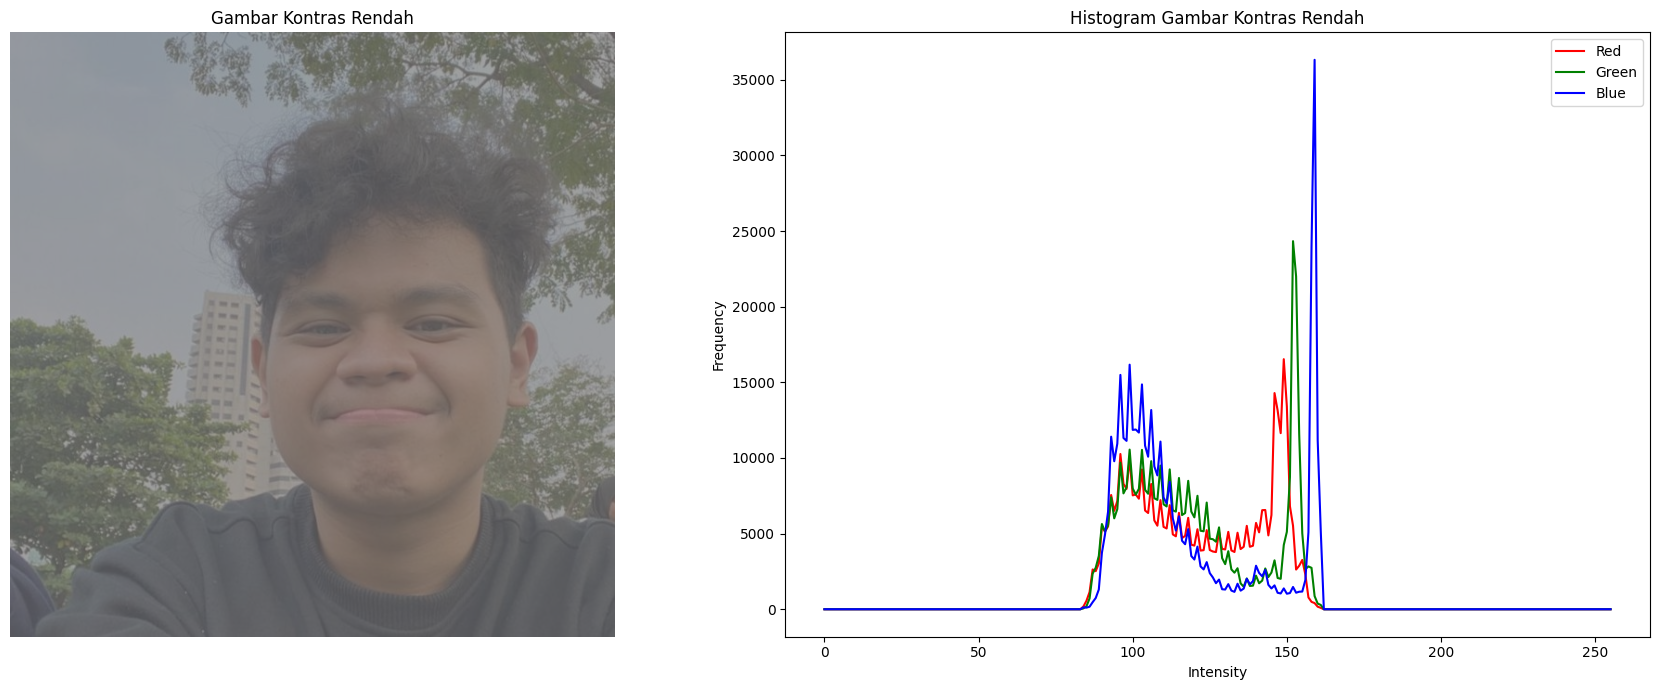

In [71]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Tentukan path gambar
path_img_sample = os.path.join(os.getcwd(), 'img1.JPG')

# Periksa apakah file gambar ada
if not os.path.exists(path_img_sample):
    print('File not found!', path_img_sample)
else:
    # Load gambar dan normalisasi dari [0, 255] ke [0, 1]
    img_sample_rgb = plt.imread(path_img_sample).astype(np.float32) / 255.0

    # Pastikan gambar dalam format RGB (hapus alpha channel jika ada)
    if img_sample_rgb.shape[2] == 4:  # Jika gambar RGBA
        img_sample_rgb = img_sample_rgb[:, :, :3]  # Ambil hanya RGB

    # Hitung rata-rata intensitas gambar
    avg_img_intensity = np.mean(img_sample_rgb)

    # Tentukan faktor penurunan kontras
    decrease_img_contrast = 0.3

    # Turunkan kontras
    img_low_contrast_sample = (decrease_img_contrast * img_sample_rgb + (1 - decrease_img_contrast) * avg_img_intensity)

    # Pastikan nilai piksel dalam rentang [0, 1]
    img_low_contrast_sample = np.clip(img_low_contrast_sample, 0, 1)

    # Hitung histogram untuk setiap channel warna
    red_histo_img = np.histogram(img_low_contrast_sample[..., 0], bins=256, range=[0, 1])[0]
    green_histo_img = np.histogram(img_low_contrast_sample[..., 1], bins=256, range=[0, 1])[0]
    blue_histo_img = np.histogram(img_low_contrast_sample[..., 2], bins=256, range=[0, 1])[0]

    # Tampilkan histogram untuk setiap channel warna
    fig, ax = plt.subplots(1, 2, figsize=(18, 7))
    
    # Tampilkan gambar kontras rendah
    ax[0].imshow(img_low_contrast_sample)
    ax[0].set_title('Gambar Kontras Rendah')
    ax[0].axis('off')
    
    # Tampilkan histogram untuk setiap channel warna
    ax[1].plot(red_histo_img, color='red', label='Red')
    ax[1].plot(green_histo_img, color='green', label='Green')
    ax[1].plot(blue_histo_img, color='blue', label='Blue')
    ax[1].set_title('Histogram Gambar Kontras Rendah')
    ax[1].set_xlabel('Intensity')
    ax[1].set_ylabel('Frequency')
    ax[1].legend(['Red', 'Green', 'Blue'])

    plt.tight_layout()
    plt.show()

    # Simpan gambar dengan kontras rendah
    path_low_contrast_img = os.path.join(os.getcwd(), 'low-contrast-img.jpg')
    plt.imsave(path_low_contrast_img, img_low_contrast_sample)


- Memastikan Format RGB: Kita memeriksa apakah gambar memiliki saluran alpha (transparansi) dan menghapusnya jika ada.
- Rata-rata Intensitas: Rata-rata dari semua nilai intensitas piksel dihitung untuk digunakan dalam proses penurunan kontras.
- Penurunan Kontras: Kontras gambar diturunkan dengan mengalikan gambar asli dengan faktor penurunan dan menamba

Pada langkah ini, telah berhasil menurunkan kontras gambar dan memvisualisasikannya beserta histogramnya.

---

## Referensi
ChatGPT: https://chatgpt.com/share/6724d570-1654-8006-a59c-01c22c5b407b